# IML Assignment 1

## Name: Tsepa Stepan
## mail: s.tsepa@innopolis.university

## Task 1

### Linear Regression
#### Data reading & plotting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('task1_data.csv')

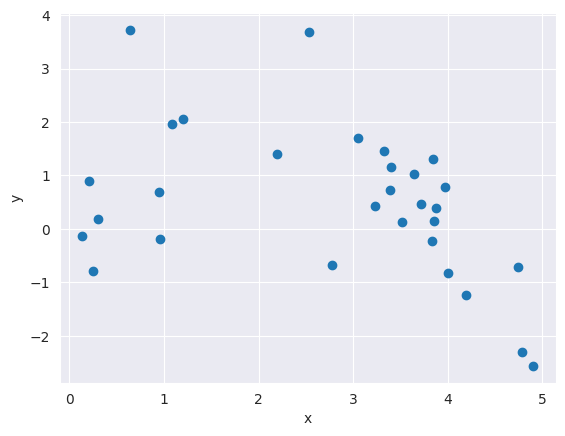

In [2]:
X_train, y_train, X_test, y_test = data.T.values

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

plt.xlabel("x")
plt.ylabel("y")

plt.scatter(X_train, y_train)
# plt.plot(X_test, y_test)

plt.show()


#### Linear regression model fitting

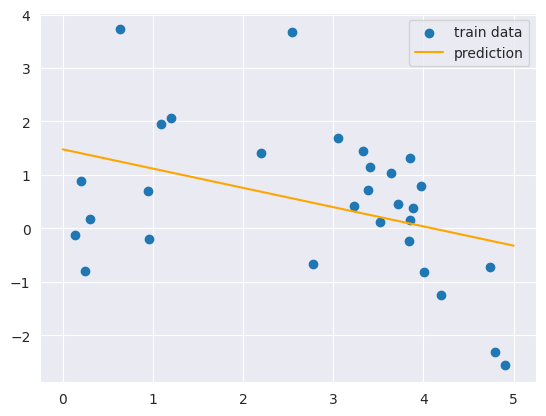

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

regr = LinearRegression()
regr.fit(X_train, y_train)

y_prediction = regr.predict(X_test).reshape(-1, 1)

plt.scatter(X_train, y_train, label="train data")
plt.plot(X_test, y_prediction, color="orange", label="prediction")

plt.legend()
plt.show()



#### Linear regression model prediction & Evaluation


In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def print_metrics(y_actual, y_prediction):
    print("MSE: ", mean_squared_error(y_actual, y_prediction))
    print("RMSE: ", mean_squared_error(y_actual, y_prediction, squared=False))
    print("MAE: ", mean_absolute_error(y_actual, y_prediction))
    print("R2: ", r2_score(y_actual, y_prediction))

print_metrics(y_test, y_prediction)

MSE:  0.78105677092199
RMSE:  0.8837741628504365
MAE:  0.7837610302414408
R2:  0.2609450135378707


#### Plotting original data and prediction


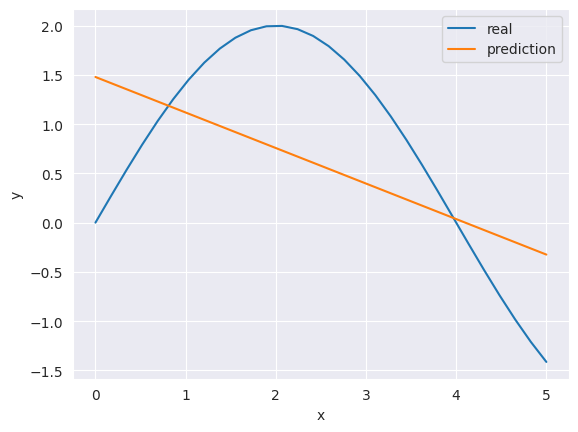

In [5]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(14, 5))

plt.plot(X_test, y_test, label="real")
plt.plot(X_test, y_prediction, label="prediction")

plt.xlabel("x")
plt.ylabel("y")

plt.legend()
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

No, because it seems that our model is under-fitting. linear model does not fit enough to train data
loss function is too big either on train nor test data

### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline

In [7]:
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

#### Tuning the degree hyper-parameter using GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV

CV = 8

# +1 bcs last element in range() less than right bound by 1
degrees_range = range(2, 10 + 1)
DEGREE_PARAM_NAME = 'polynomialfeatures__degree'


search = GridSearchCV(
    pipeline,
    param_grid={
        DEGREE_PARAM_NAME: degrees_range
    },
    cv=CV,
    scoring='neg_mean_squared_error'
)
search.fit(X_train, y_train)

y_prediction = search.predict(X_test)
# x =

best_degree = search.best_params_[DEGREE_PARAM_NAME]
best_score = search.best_score_

print("Best parameter (CV score=%0.3f):", best_degree)
print("Best score:", best_score)

Best parameter (CV score=%0.3f): 2
Best score: -1.0783084797230353


In [9]:
print_metrics(y_test, y_prediction)

MSE:  0.08205877217937993
RMSE:  0.2864590235607528
MAE:  0.15213273421671733
R2:  0.9223539862658873


#### Manually finding the best degree

In [10]:

best_degree_my = 0
best_score_my = -float('inf')

for degree in degrees_range:
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )

    cv_score_list = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=CV,
        scoring='neg_mean_squared_error'
    )
    score = cv_score_list.mean()

    if score > best_score_my:
        best_degree_my = degree
        best_score_my = score

print('(MY) Best degree and neg MSE:')
print(best_degree_my, best_score_my)

assert best_degree == best_degree_my
assert abs(best_score - best_score_my) < 10 ** -9


(MY) Best degree and neg MSE:
2 -1.0783084797230353


#### Plotting the test data and the best degree polynomial model

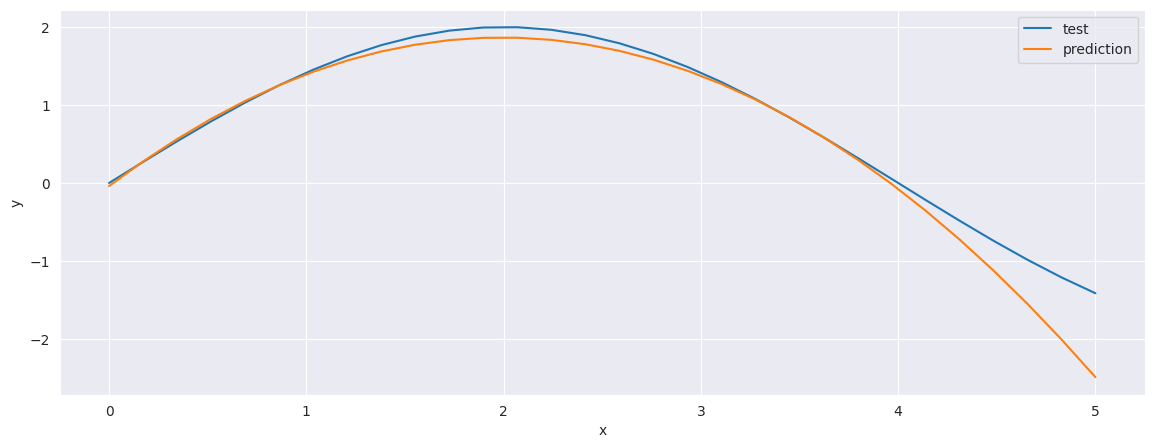

In [11]:
plt.figure(figsize=(14, 5))

plt.plot(X_test, y_test, label="test")
plt.plot(X_test, y_prediction, label="prediction")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [56]:
import pandas as pd

df = pd.read_csv("pokemon_modified.csv")
print(df.shape)
df

(801, 37)


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,...,97,Celesteela,NaN,steel,107,101,61,999.9,7,1
797,1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,...,59,Kartana,NaN,grass,59,31,109,0.1,7,1
798,2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,...,223,Guzzlord,NaN,dark,97,53,43,888.0,7,1
799,2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,...,97,Necrozma,NaN,psychic,127,89,79,230.0,7,1


In [57]:
# col1 = df.iloc[:, 0]
# print(df.shape[0])

def feature_uniqness(col: pd.Series):
    uniq_values_cnt = len(set(col))
    labels_cnt = df.shape[0]
    return uniq_values_cnt / labels_cnt

cols_uniq_dict = {}

for colname in df.columns:
    col: pd.Series = df[colname]
    cols_uniq_dict[colname] = feature_uniqness(col)

cols_uniqnesses = sorted(
    cols_uniq_dict.items(),
    key=lambda x: x[1],
    reverse=True
)

less_uniq = cols_uniqnesses[:2]

print("Less unique features:")
print(*less_uniq, sep="\n")


Less unique features:
('name', 1.0)
('classification', 0.7340823970037453)


#### Remove the 2 redundant features

In [58]:

print(less_uniq)
for colname, uniqness in less_uniq:
    df = df.drop(colname, axis=1)

LABEL_NAME = "is_legendary"

y = df[LABEL_NAME]
X = df.drop(LABEL_NAME, axis=1)  # Result is not saved to 'df'

[('name', 1.0), ('classification', 0.7340823970037453)]


#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=1
)

Check if the dataset is balanced or not and comment on it

In [60]:

label1_cnt = len(list(filter(lambda x: x == 1, y)))
label0_cnt = len(list(filter(lambda x: x == 0, y)))

print('Percentage legendary:', label1_cnt / len(y))
print('Percentage non-legendary:', label0_cnt / len(y))


Percentage legendary: 0.08739076154806492
Percentage non-legendary: 0.9126092384519351


So, dataset is very unbalanced in terms of label

#### Exploring the dataset and checking for missing values

In [61]:

print(df.head())
print(df.info())


   against_bug  against_dark  against_dragon  against_electric  against_fairy  \
0          1.0           1.0             1.0               0.5            0.5   
1          1.0           1.0             1.0               0.5            0.5   
2          1.0           1.0             1.0               0.5            0.5   
3          0.5           1.0             1.0               1.0            0.5   
4          0.5           1.0             1.0               1.0            0.5   

   against_fight  against_fire  against_flying  against_ghost  against_grass  \
0            0.5           2.0             2.0            1.0           0.25   
1            0.5           2.0             2.0            1.0           0.25   
2            0.5           2.0             2.0            1.0           0.25   
3            1.0           0.5             1.0            1.0           0.50   
4            1.0           0.5             1.0            1.0           0.50   

   ...  height_m  hp  percentage

In [62]:

def get_nullable_cols(df: pd.DataFrame):
    null_cols_list = []
    for col in df.columns:
        is_null_list = df[col].isnull()

        if any(is_null_list):
            null_cols_list.append([col, sum(is_null_list)])

    return null_cols_list

nullable_cols = get_nullable_cols(df)

print("Columns with null values and its count:", *nullable_cols, sep="\n")
# print("")

Columns with null values and its count:
['height_m', 20]
['percentage_male', 98]
['weight_kg', 20]


#### Impute the missing values

In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

X_train_imputed = pd.DataFrame(
    imputer.transform(X_train),
    columns=X_train.columns
)
X_test_imputed = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns
)

#### Double check that there are no missing values

In [64]:

assert len(get_nullable_cols(X_train_imputed)) == 0
assert len(get_nullable_cols(X_test_imputed)) == 0

X_train = X_train_imputed
X_test = X_test_imputed

#### Encode categorically

In [65]:
from sklearn.preprocessing import OneHotEncoder

num_cols = df.select_dtypes(include=np.number)
categorical_names = list(set(df.columns) - set(num_cols))

print(categorical_names)

def encode_features(df, feats_names, encoder) -> pd.DataFrame:
    onehot_feature_cols = encoder.transform(df[feats_names])
    cols_names = encoder.get_feature_names_out(feats_names)

    new_df_cols = pd.DataFrame(
        onehot_feature_cols,
        columns=cols_names
    )

    df = df.drop(feats_names, axis=1)
    df = pd.concat([df, new_df_cols], axis=1)
    return df

encoder = OneHotEncoder(sparse=False)
encoder.fit(X_train[categorical_names])

X_train = encode_features(X_train, categorical_names, encoder)
X_test = encode_features(X_test, categorical_names, encoder)


['type1']


/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Scale the data

In [66]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(
    data=scaler.transform(X_train),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    data=scaler.transform(X_test),
    columns=X_test.columns
)

X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.200000,0.200000,0.50,0.125,0.200000,0.2500,0.200000,0.066667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.466667,0.466667,0.50,0.250,0.200000,0.1250,0.200000,0.200000,0.50,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.066667,0.066667,0.00,0.250,0.200000,0.1250,0.200000,0.200000,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200000,0.200000,1.00,0.125,0.466667,0.2500,0.066667,0.200000,0.25,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.466667,0.50,0.250,0.200000,0.0000,0.200000,0.200000,0.50,0.200000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.000000,0.200000,0.50,0.500,0.066667,0.1250,0.066667,0.200000,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,0.066667,0.200000,0.25,0.000,0.066667,0.5000,0.466667,0.066667,0.25,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
637,0.200000,0.200000,0.50,0.500,0.200000,0.2500,0.066667,0.200000,0.25,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
638,0.066667,0.200000,0.50,0.500,0.200000,0.0625,0.466667,0.466667,0.25,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Confusion Matrix

Are there highly co-related features in the dataset? Is it a problem?

<Axes: >

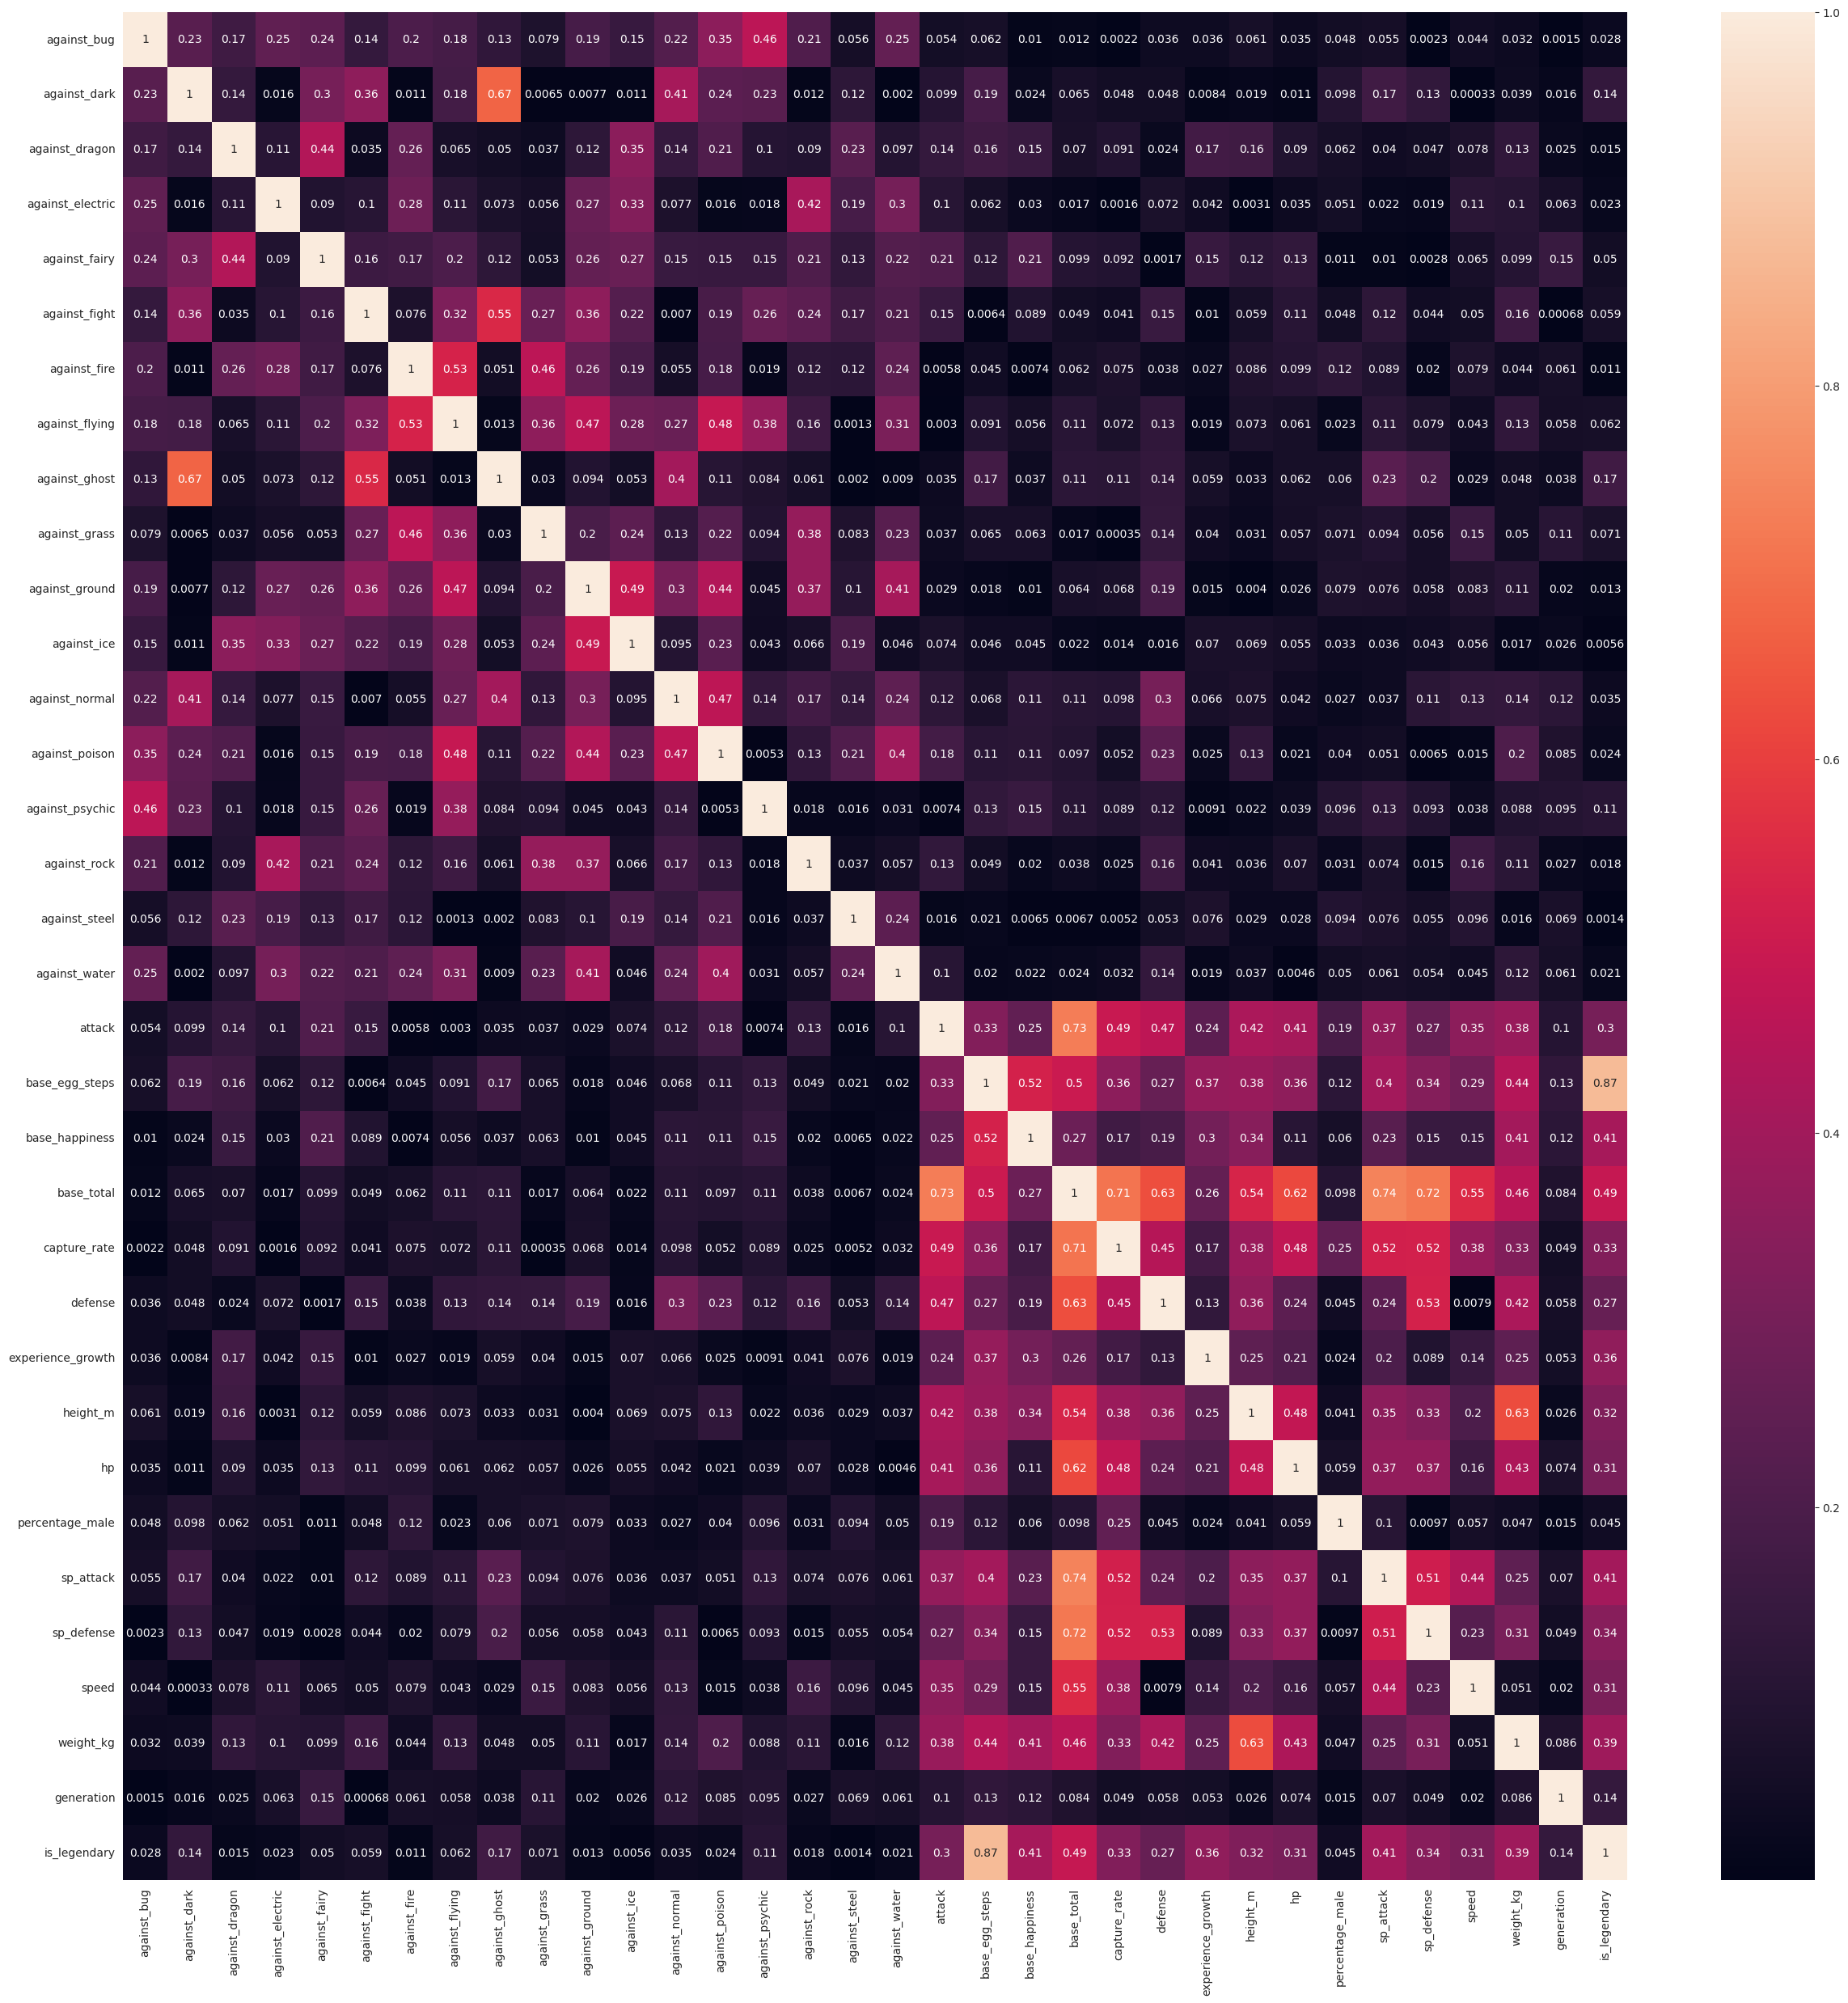

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df.corr(numeric_only=True).abs()

plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True)

### Model fitting and Comparison

#### Tuning LR model

In [68]:
X_train = X_train.drop(["base_total"], axis=1)
X_test = X_test.drop(["base_total"], axis=1)

In [69]:
# caclulate and print metrics
def print_clf_metrics( y_actual, y_pred ):
   print("Accuracy:", metrics.accuracy_score(y_actual, y_pred))
   print("Precision:", metrics.precision_score(y_actual, y_pred))
   print("Recall:", metrics.recall_score(y_actual, y_pred))
   print("F1:",  metrics.f1_score(y_actual, y_pred))



In [70]:

params1 = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['liblinear']
}

params2 = {
    'penalty': ['l2', None],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs']
}

max_iter=1000 in LR constructor

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

MAX_ITER = 1000

lreg = LogisticRegression(max_iter=MAX_ITER)
gs_clf = GridSearchCV(
    lreg,
    [params1, params2]
)

In [72]:
gs_clf.fit(X_train, y_train)
y_prediction = gs_clf.predict(X_test)


/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/void/gh/scripts/python/ml_hw1/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio paramete

In [73]:
print_clf_metrics(y_test, y_prediction)

Accuracy: 0.9813664596273292
Precision: 1.0
Recall: 0.7857142857142857
F1: 0.88


In [74]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.990625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [75]:
best_penalty = gs_clf.best_params_.get('penalty')
best_c = gs_clf.best_params_.get('C')
best_solver = gs_clf.best_params_.get('solver')

lr_clf = LogisticRegression(
    max_iter=MAX_ITER,
    penalty=best_penalty,
    C=best_c,
    solver=best_solver
)

In [76]:
lr_clf.fit(X_train, y_train)
y_prediction = lr_clf.predict(X_test)

In [77]:
print_clf_metrics(y_test, y_prediction)

Accuracy: 0.9813664596273292
Precision: 1.0
Recall: 0.7857142857142857
F1: 0.88


#### Print the top 5 most influencing features and the top 5 ignored features

In [79]:
features_influence = lr_clf.coef_[0]
features_names = X_train.columns

items = [(features_names[i], features_influence[i]) for i in range(len(features_names))]
items.sort(key=lambda x: x[1])

top_ignored = items[:5]
top_influenced = items[-5:]

print("Top ignored:")
print(*top_ignored, sep='\n')

print("\nTop influenced:")
print(*top_influenced, sep='\n')

# items

Top ignored:
('capture_rate', -3.4980668184636285)
('against_dragon', -3.0034981482485033)
('type1_normal', -2.8664944095952904)
('percentage_male', -0.619328557034517)
('against_bug', 0.0)

Top influenced:
('type1_steel', 0.0)
('speed', 0.18301372817433303)
('type1_water', 0.18933983870869234)
('type1_psychic', 0.48541959444094795)
('base_egg_steps', 8.94954654782131)


#### Tuning KNN model

In [80]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors' : np.arange(1, 15),
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']
}

grid_search_clf = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid
)
grid_search_clf.fit(X_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.9609375


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [81]:
best_n_neighbours = grid_search_clf.best_params_['n_neighbors']
best_weights = grid_search_clf.best_params_['weights']
best_metric = grid_search_clf.best_params_['metric']

knn = KNeighborsClassifier(
    n_neighbors=best_n_neighbours,
    weights=best_weights,
    metric=best_metric,
)

knn.fit(X_train, y_train)
y_prediction = knn.predict(X_test)

print_clf_metrics(y_test, y_prediction)

Accuracy: 0.9565217391304348
Precision: 1.0
Recall: 0.5
F1: 0.6666666666666666


#### Fitting GNB to the data and evaluating on the test dataset

In [82]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
y_prediction = gauss_nb.predict(X_test)

print_clf_metrics(y_test, y_prediction)


Accuracy: 0.6335403726708074
Precision: 0.16417910447761194
Recall: 0.7857142857142857
F1: 0.2716049382716049


#### Which metric is most appropriate for this task and why?



#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

## Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd
train_data =

test_data =

train_data

In [ ]:
X_train =
y_train =

X_test =
y_test =

print(X_train, y_train, X_test, y_test)

####  Plot the data using the pairplot in sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
multi_lr =


In [ ]:
print()

#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
multi_lr =

In [ ]:
print()

#### Using gridsearch to tune the C value and multi class

In [189]:
params =

SyntaxError: invalid syntax (1520488895.py, line 1)

In [ ]:
grid_search_clf =

grid_search_clf.

In [ ]:
print("Tuned Hyperparameters :")
print("Accuracy :")

In [190]:
grid_search_clf.

SyntaxError: invalid syntax (4194740191.py, line 1)

#### Comment on why one multi_class technique was better than the other

#### Create LR with the best params

In [191]:
multi_lr =

SyntaxError: invalid syntax (1720916159.py, line 1)

#### Visualize the decision boundaries

In [192]:
from mlxtend.plotting import plot_decision_regions
multi_lr =

plot_decision_regions()

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundary)
plt.show()

SyntaxError: unterminated string literal (detected at line 8) (569255960.py, line 8)

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?